In [1]:
import pandas as pd
import numpy as np


In [2]:
!gdown --id 1uRt7D5ZRFylw1XoR_Y_BmpdOhmd2yg6l


/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uRt7D5ZRFylw1XoR_Y_BmpdOhmd2yg6l
To: /content/labs.csv
100% 8.32M/8.32M [00:00<00:00, 108MB/s]


In [3]:
df = pd.read_csv("labs.csv")

In [4]:
df.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [5]:
df.shape

(9813, 424)

In [6]:
df = df.drop([ 'SEQN'], axis =1)

In [7]:

df = df.loc[:,~df.T.duplicated(keep='first')]


In [8]:
df.shape

(9813, 412)

In [9]:
df.head()

,URXUMA,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,LBDSALSI,LBXSAPSI,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,41.0,129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,47.0,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,37.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,43.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [10]:
df_tar = df['LBXGH']
df_tar

0       13.9
1        9.1
2        8.9
3        NaN
4        4.9
        ... 
9808     5.0
9809     NaN
9810     5.3
9811     NaN
9812     NaN
Name: LBXGH, Length: 9813, dtype: float64

In [11]:
#def missing(df_tar):
 # print (round((df_tar.isnull().sum() * 100/ len(df_tar)),2).sort_values(ascending=False))

#missing(df_tar)


In [12]:
mean_value=df['LBXGH'].mean()

df['LBXGH'].fillna(value=mean_value, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
df['LBXGH'].describe()

count    9813.000000
mean        5.642556
std         0.826745
min         3.500000
25%         5.300000
50%         5.642556
75%         5.642556
max        17.500000
Name: LBXGH, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LBXGH'>

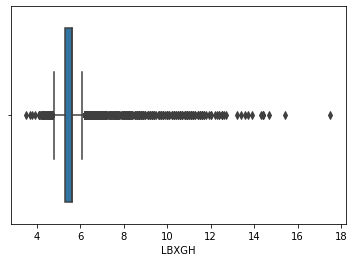

In [14]:
import seaborn as sns
sns.boxplot(df['LBXGH'])

In [15]:
# Position of the Outlier
import numpy as np
print(np.where(df['LBXGH']>15))

(array([7000, 9222]),)


In [16]:
df.drop([7000,9222],inplace = True)

In [17]:
df.shape

(9811, 412)

In [18]:
def missing(df):
    print (round((df.isnull().sum() * 100/ len(df)),2).sort_values(ascending=False))

missing(df)



LBXEMA        99.65
PHAANTHR      99.62
PHAANTMN      99.62
PHAALCHR      99.57
PHAALCMN      99.57
              ...  
PHQ060         6.43
PHAFSTHR.x     6.43
PHAFSTMN.x     6.43
PHDSESN        3.99
LBXGH          0.00
Length: 412, dtype: float64


In [19]:
# Below code gives percentage of null in every column
null_percentage = df.isnull().sum()/df.shape[0]*100

# Below code gives list of columns having more than 60% null
col_to_drop = null_percentage[null_percentage>60].keys()

new_df = df.drop(col_to_drop, axis=1)

In [20]:
len(col_to_drop)

264

In [21]:
new_df.shape

(9811, 148)

In [22]:
new_df.head(5)

,URXUMA,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,...,LBDTHGLC,LBXBSE,LBDBSESI,LBXBMN,LBDBMNSI,URXUTRI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,4.3,39.0,3447.6,11.03,4.1,41.0,129.0,16.0,16.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,87.0,0.821,524.0,386.7
1,153.0,50.0,4420.0,306.00,4.7,47.0,97.0,18.0,29.0,16.0,...,0.0,204.73,2.60,8.15,148.33,2.0,90.0,1.636,507.0,374.2
2,11.9,113.0,9989.2,10.53,3.7,37.0,99.0,22.0,16.0,14.0,...,0.0,209.64,2.66,9.57,174.17,NaN,66.0,NaN,732.0,540.2
3,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,169.82,2.16,13.07,237.87,NaN,61.0,0.575,NaN,NaN
4,255.0,147.0,12994.8,173.47,4.3,43.0,78.0,36.0,28.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.109,225.0,166.1


In [23]:
new_df.describe()

,URXUMA,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,...,LBDTHGLC,LBXBSE,LBDBSESI,LBXBMN,LBDBMNSI,URXUTRI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
count,8050.000000,8050.000000,8050.000000,8050.000000,6552.000000,6552.000000,6551.000000,6550.000000,6550.000000,6552.000000,...,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,4055.000000,8055.000000,7148.000000,5315.000000,5315.000000
mean,41.122262,121.072050,10702.769193,41.837696,4.282143,42.821429,78.570753,25.118779,24.070534,12.862179,...,0.256809,188.604012,2.395299,10.507165,191.230393,1.982491,109.114215,0.907997,640.141486,472.425287
std,238.817534,78.583727,6946.801489,276.248072,0.343643,3.436429,51.614559,17.741891,18.486220,5.993643,...,0.436915,26.083172,0.331267,3.717767,67.663379,0.131175,82.496335,0.954879,752.031827,554.999318
min,0.210000,5.000000,442.000000,0.210000,2.400000,24.000000,9.000000,9.000000,6.000000,1.000000,...,0.000000,86.090000,1.090000,1.750000,31.850000,1.000000,0.000000,0.000000,18.000000,13.300000
25%,4.500000,60.000000,5304.000000,5.020000,4.100000,41.000000,53.000000,19.000000,15.000000,9.000000,...,0.000000,171.732500,2.180000,7.970000,145.050000,2.000000,46.000000,0.375000,381.000000,281.200000
50%,8.400000,106.000000,9370.400000,7.780000,4.300000,43.000000,66.000000,22.000000,20.000000,12.000000,...,0.000000,186.500000,2.370000,9.890000,180.000000,2.000000,86.000000,0.647000,514.000000,379.300000
75%,17.600000,163.000000,14409.200000,15.282500,4.500000,45.000000,83.000000,27.000000,27.000000,15.000000,...,1.000000,202.160000,2.570000,12.397500,225.635000,2.000000,150.000000,1.110000,711.000000,524.700000
max,9600.000000,659.000000,58255.600000,9000.000000,5.600000,56.000000,907.000000,882.000000,536.000000,95.000000,...,1.000000,734.800000,9.330000,54.920000,999.540000,2.000000,552.000000,26.000000,26801.000000,19779.100000


In [24]:
data = new_df.fillna(new_df.mean())
data.head(5)

,URXUMA,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI,LBXSASSI,LBXSATSI,LBXSBU,...,LBDTHGLC,LBXBSE,LBDBSESI,LBXBMN,LBDBMNSI,URXUTRI,URXVOL1,URDFLOW1,LBDB12,LBDB12SI
0,4.3,39.0,3447.6,11.03,4.100000,41.000000,129.000000,16.000000,16.000000,10.000000,...,0.256809,188.604012,2.395299,10.507165,191.230393,1.982491,87.0,0.821000,524.000000,386.700000
1,153.0,50.0,4420.0,306.00,4.700000,47.000000,97.000000,18.000000,29.000000,16.000000,...,0.000000,204.730000,2.600000,8.150000,148.330000,2.000000,90.0,1.636000,507.000000,374.200000
2,11.9,113.0,9989.2,10.53,3.700000,37.000000,99.000000,22.000000,16.000000,14.000000,...,0.000000,209.640000,2.660000,9.570000,174.170000,1.982491,66.0,0.907997,732.000000,540.200000
3,16.0,76.0,6718.4,21.05,4.282143,42.821429,78.570753,25.118779,24.070534,12.862179,...,0.000000,169.820000,2.160000,13.070000,237.870000,1.982491,61.0,0.575000,640.141486,472.425287
4,255.0,147.0,12994.8,173.47,4.300000,43.000000,78.000000,36.000000,28.000000,31.000000,...,0.256809,188.604012,2.395299,10.507165,191.230393,1.982491,5.0,0.109000,225.000000,166.100000


In [25]:
def missing(data):
    print (round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False))

missing(data)

URXUMA      0.0
ORXH51      0.0
ORXH53      0.0
ORXH54      0.0
ORXH55      0.0
           ... 
LBDNENO     0.0
LBDEONO     0.0
LBDBANO     0.0
LBXRBCSI    0.0
LBDB12SI    0.0
Length: 148, dtype: float64


In [26]:
#df_x = data.drop(['LBXGH'],axis =1)

Find Corelation of the features with the target 

In [27]:
import numpy as np

# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

<ipython-input-27-97393668b7ea>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [28]:
data.shape

(9811, 79)

In [29]:
corr_matrix = data.corr()
print(corr_matrix["LBXGH"].sort_values(ascending=False))

LBXGH       1.000000
LBXSGL      0.780702
LBXSOSSI    0.293021
LBXSTR      0.210545
LBXSBU      0.196846
              ...   
LBDHDD     -0.129675
LBXSNASI   -0.149588
LBXSAL     -0.214571
LBXSCLSI   -0.216709
LBDBPBLC         NaN
Name: LBXGH, Length: 79, dtype: float64


In [32]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Select the top 10 most positively correlated columns
pos_corr_cols = corr_matrix.nlargest(10, "LBXGH")["LBXGH"].index.tolist()

# Select the top 10 most negatively correlated columns
neg_corr_cols = corr_matrix.nsmallest(10, "LBXGH")["LBXGH"].index.tolist()

# Combine the lists of positively and negatively correlated columns
selected_cols = pos_corr_cols + neg_corr_cols

In [34]:
selected_cols

['LBXGH',
 'LBXSGL',
 'LBXSOSSI',
 'LBXSTR',
 'LBXSBU',
 'URXUMA',
 'LBXSGB',
 'LBXRDW',
 'LBXSCR',
 'LBXSKSI',
 'LBXSCLSI',
 'LBXSAL',
 'LBXSNASI',
 'LBDHDD',
 'LBXSIR',
 'LBXSTB',
 'LBXMC',
 'LBDHEG',
 'WTSH2YR.x',
 'LBXSPH']

In [ ]:
# Renaming

LBXGH',	Glycohemoglobin
LBXSGL',	Glucose
LBXSOSSI',	Osmolality
LBXSTR',	Triglycerides
LBXSBU',	Blood_urea_nitrogen
URXUMA',	Albumin_urine
LBXSGB',	Globulin
LBXRDW',	Red_cell_distribution
LBXSCR',	Creatinine
LBXSKSI',	Potassium
LBXSCLSI',	Chloride
LBXSAL',	Albumin
LBXSNASI',	Sodium
LBDHDD',	Direct HDL-Cholesterol
LBXSIR',	Iron
LBXSTB',	Total bilirubin
LBXMC',	Mean cell hemoglobin concentration
LBDHEG',	Hepatitis E IgG
WTSH2YR', Blood_metal_weights
LBXSPH'	 Phosphorus
	
	